In [1]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 937.7/937.7 KB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 25.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 15.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import shap
import matplotlib.pyplot as plt

In [12]:
# Load data
df1 = pd.read_excel("data/Alkaline pretreatment (Published).xlsx", skiprows=1)
df2 = pd.read_excel("data/Waste data.xlsx", skiprows=1)

In [10]:
df1.head()

,Retention Time (Days),Temp. Deg. C,NaOH concentration (% w/w),Exposure time (min),Biomathene (ml CH4/g VSadded)
0,1,29,1,60,0.00
1,2,29,1,60,42.90
2,3,28,1,60,117.52
3,4,22,1,60,145.75
4,5,19,1,60,163.17


In [13]:
df2.head()

,Unnamed: 0,Unnamed: 1,MC (%),C (%),H (%),O (%),N (%),S (%),Ash (%),HHV (MJ/kg)
0,General waste,Food,70.0,48.0,6.4,37.6,2.6,0.4,5.0,5.512
1,NaN,Paper,6.0,43.5,6.0,44.0,0.3,0.2,6.0,15.800
2,NaN,Plastics,2.0,60.0,7.2,22.8,0.0,0.0,10.0,32.564
3,NaN,Textiles,10.0,55.0,6.6,31.2,4.6,0.2,2.5,17.245
4,NaN,Wood,20.0,49.5,6.0,42.7,0.2,0.1,1.5,18.608


In [16]:

from sklearn.model_selection import train_test_split

# Supervised: Dataset 1
X1 = df1[["Retention Time (Days)", "Temp. Deg. C", "NaOH concentration (% w/w)", "Exposure time (min)"]]
y1 = df1["Biomathene (ml CH4/g VSadded)"]
# rf1 = RandomForestRegressor().fit(X1, y1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor on the training data
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# # Calculate performance metrics
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

Metric	Description	Units
MSE	Average of the squared differences between predicted and actual values	Squared units of the target variable
MAE	Average of the absolute differences between predicted and actual values	Same units as the target variable
R²	Proportion of variance in the target variable explained by the model	Unitless
RMSE	Square root of the mean squared error, providing error in the same units as the target	Same units as the target variable

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming y_test are actual values and y_pred are predictions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 354.0459036792851
RMSE: 18.816107559197388
MAE: 8.164569047619015
R²: 0.938503502918115


Training Set (X_train, y_train): The model learns patterns from this 80% of the data.
Testing Set (X_test, y_test): The remaining 20% is used to test how well the model predicts on unseen data.
Metrics:
MSE: Average squared difference between predicted and actual values.
RMSE: Square root of MSE, in the same units as the target.
MAE: Average absolute difference, showing typical error magnitude.
R²: Proportion of variance explained by the model (closer to 1 is better).

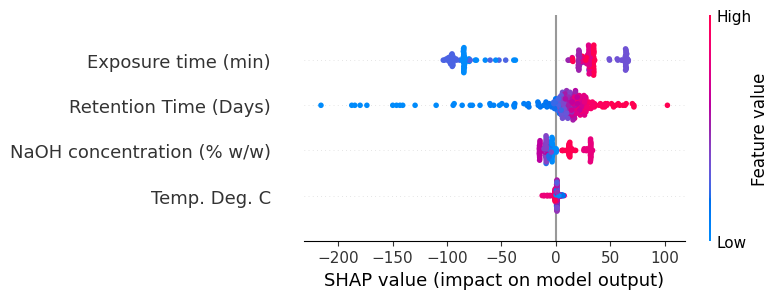

In [18]:
explainer1 = shap.TreeExplainer(rf)
shap_values1 = explainer1.shap_values(X1)
shap.summary_plot(shap_values1, X1, show=False)
plt.savefig("shap_summary1.png", dpi=300)

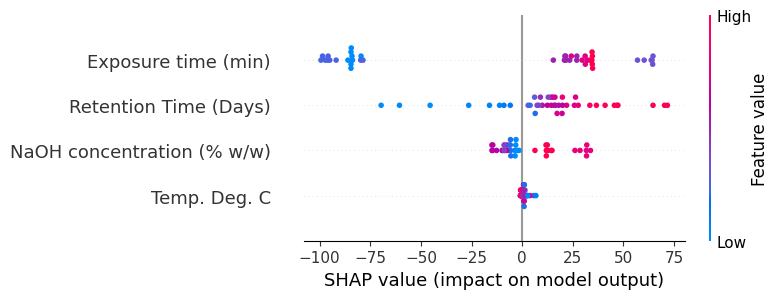

In [24]:
shap_values = explainer1.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [25]:
shap.summary_plot(shap_values[0], X_test)

AssertionError: Summary plots need a matrix of shap_values, not a vector.

<Figure size 640x480 with 0 Axes>

/mnt/c/Users/ireti/Documents/research/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


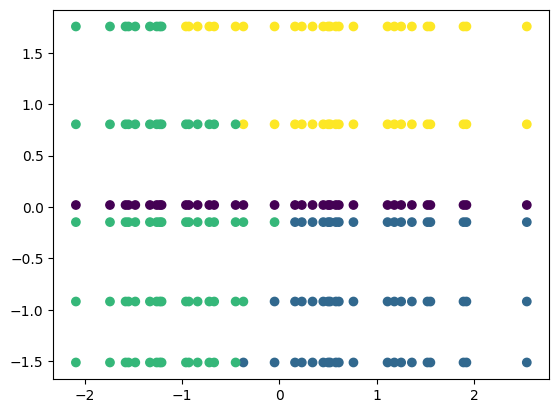

In [20]:


# Unsupervised: Dataset 1
scaler = StandardScaler().fit_transform(X1)
kmeans1 = KMeans(n_clusters=4).fit(scaler)
pca = PCA(n_components=2).fit_transform(scaler)
plt.scatter(pca[:, 0], pca[:, 1], c=kmeans1.labels_)
plt.savefig("clusters1.png", dpi=300)

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Load data
# df1 = pd.read_excel("Alkaline Pretreatment (Published).xlsx")
# X1 = df1[["Retention Time (Days)", "Temp. Deg. C", "NaOH concentration (% w/w)", "Exposure time (min)"]]

# Standardize features
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# Apply GMM clustering with 4 components
gmm1 = GaussianMixture(n_components=4, random_state=42)
clusters1 = gmm1.fit_predict(X1_scaled)

# Reduce to 2D with PCA
pca1 = PCA(n_components=2)
X1_pca = pca1.fit_transform(X1_scaled)

# Plot
plt.figure(figsize=(8, 6))
colors = ['lightblue', 'cyan', 'red', 'gray']  # Match image colors
scatter = plt.scatter(X1_pca[:, 0], X1_pca[:, 1], c=[colors[i] for i in clusters1], s=50, alpha=0.8)

# Draw ellipses
for i in range(4):
    # Transform mean and covariance to PCA space
    mean = pca1.transform(gmm1.means_)[i]
    cov = np.dot(np.dot(pca1.components_, gmm1.covariances_[i]), pca1.components_.T)
    v, w = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(w[0, 1], w[0, 0]))
    width, height = 2 * 2 * np.sqrt(v)  # 2 standard deviations
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor='black', facecolor=colors[i], alpha=0.3)
    plt.gca().add_patch(ellipse)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering of Alkaline Pretreatment Data')
plt.legend(handles=scatter.legend_elements()[0], labels=['Group 1', 'Group 2', 'Group 3', 'Group 4'],
           title='Clusters', loc='best')
plt.grid(True)
plt.savefig('clustering_alkaline_pretreatment.png', dpi=300, bbox_inches='tight')
plt.close()

/mnt/c/Users/ireti/Documents/research/env/lib/python3.10/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [22]:
# Load data
# df2 = pd.read_excel("Waste Data.xlsx")
X2 = df2[["MC (%)", "C (%)", "H (%)", "O (%)", "N (%)", "S (%)", "Ash (%)"]]

# Standardize features
X2_scaled = scaler.fit_transform(X2)

# Apply GMM clustering with 4 components
gmm2 = GaussianMixture(n_components=4, random_state=42)
clusters2 = gmm2.fit_predict(X2_scaled)

# Reduce to 2D with PCA
pca2 = PCA(n_components=2)
X2_pca = pca2.fit_transform(X2_scaled)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=[colors[i] for i in clusters2], s=50, alpha=0.8)

# Draw ellipses
for i in range(4):
    mean = pca2.transform(gmm2.means_)[i]
    cov = np.dot(np.dot(pca2.components_, gmm2.covariances_[i]), pca2.components_.T)
    v, w = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(w[0, 1], w[0, 0]))
    width, height = 2 * 2 * np.sqrt(v)  # 2 standard deviations
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor='black', facecolor=colors[i], alpha=0.3)
    plt.gca().add_patch(ellipse)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering of Waste Data')
plt.legend(handles=scatter.legend_elements()[0], labels=['Group 1', 'Group 2', 'Group 3', 'Group 4'],
           title='Clusters', loc='best')
plt.grid(True)
plt.savefig('clustering_waste_data.png', dpi=300, bbox_inches='tight')
plt.close()

/mnt/c/Users/ireti/Documents/research/env/lib/python3.10/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
